In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

/home/daan/.local/lib/python3.5/site-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [2]:
df = pd.read_csv('light_log.csv', sep=';', header=None, names=['light_timing', 'timestamp'], parse_dates=[1])

Quelques examples:

In [3]:
df.tail()

light_timing                  timestamp
1388         41.30 2016-03-25 21:36:06.547993
1389         42.15 2016-03-25 21:37:06.437228
1390         46.90 2016-03-25 21:38:06.311772
1391         44.35 2016-03-25 21:39:06.093048
1392         48.15 2016-03-25 21:40:05.775131

On fait un petit plot pour voir comment les mesures changent en fonction du temps.

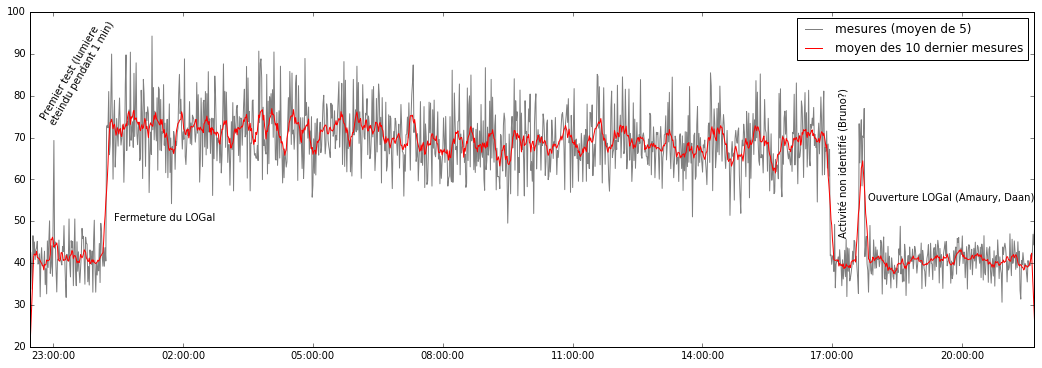

In [4]:
plt.figure(figsize=(18, 6))
plt.plot(df.timestamp, df.light_timing, 'grey', label='mesures (moyen de 5)')
plt.plot(df.timestamp, np.convolve(df.light_timing, [1. / 10] * 10, 'same'), 'r-', label='moyen des 10 dernier mesures')
plt.text(pd.Timestamp('2016-03-24 22:40'), 95, 'Premier test (lumiere\neteindu pendant 1 min)', rotation=60)
plt.text(pd.Timestamp('2016-03-25 00:25'), 50, 'Fermeture du LOGal')
plt.text(pd.Timestamp('2016-03-25 17:10'), 80, 'Activité non identifié (Bruno?)', rotation=90)
plt.text(pd.Timestamp('2016-03-25 17:50'), 55, 'Ouverture LOGal (Amaury, Daan)')
plt.legend()

Ben, on a oublié de choisir la bonne timezone sur le Pi.
Donc tout les temps sont shiftées par une heure.
C'est fixé sur le pi.

On voit que le test le jeudi soir n'aurait pas eu le statusbot car 

Mais qu'est-ce que c'est la à 17:00-18:00?

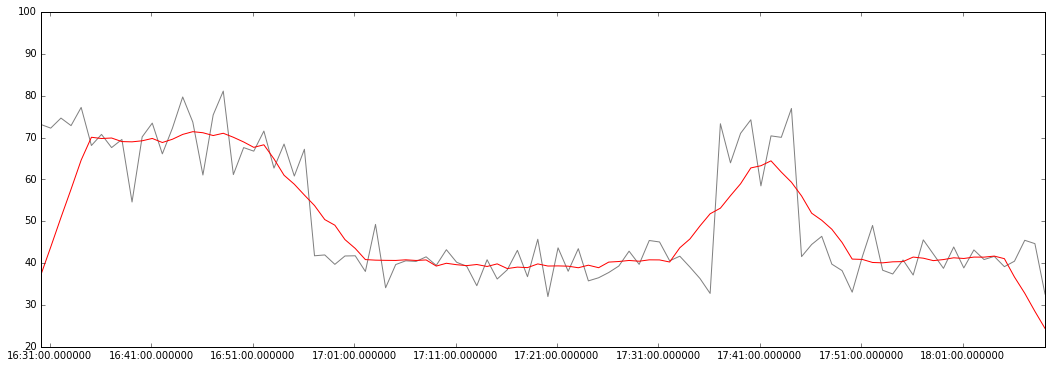

In [5]:
df1 = df[(pd.Timestamp('2016-03-25 16:30:00.0') < df.timestamp) & (df.timestamp < pd.Timestamp('2016-03-25 18:10:00.0'))]
plt.figure(figsize=(18, 6))
plt.ylim(20, 100)
plt.plot(df1.timestamp, df1.light_timing, 'grey', label='mesures (moyen de 5)')
plt.plot(df1.timestamp, np.convolve(df1.light_timing, [1. / 10] * 10, 'same'), 'r-', label='moyen des 10 dernier mesures')

Apparement il y avait qn au LOGal de ~17:55 jusq'a ~17:35.
Amory et moi sont arrivé a ~17:45 - on s'est juste raté. :P

Donc **un moyen des dernières 10 valeurs mesurées sera probablement suffisant pour determiner l'état du LOGal.**